In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

# New Challenges

## **Challenge 1:** 

We saw yesterday that the top 10 products for 2018 was composed of significantly more Apple products than the same top 10 for 2017. I'd like to investigate this business trend further.

Create a bar graph showing the total number of Apple products sold for each month

In [3]:
# how to find apple products
brands[brands.long == 'Apple']

,short,long
6,AP2,Apple
7,APP,Apple


In [4]:
# extract the short code from the sku
orderlines['short_sku'] = orderlines['sku'].str[0:3]

In [5]:
# change created_date to a datetime format
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [6]:
# aggregate the totals for each month of each year
bar_df = (
orderlines
    .loc[(orderlines.short_sku == 'APP') | (orderlines.short_sku == 'AP2')]
    .assign(year = orderlines['date'].dt.strftime('%Y'), 
           month = orderlines['date'].dt.strftime('%b'))
    .groupby(['year','month'])
    .agg({'product_quantity':'sum'})
    .reset_index()
)
bar_df

,year,month,product_quantity
0,2017,Apr,4496
1,2017,Aug,3962
2,2017,Dec,15915
3,2017,Feb,3343
4,2017,Jan,4959
5,2017,Jul,5903
6,2017,Jun,3936
7,2017,Mar,2773
8,2017,May,3016
9,2017,Nov,18370


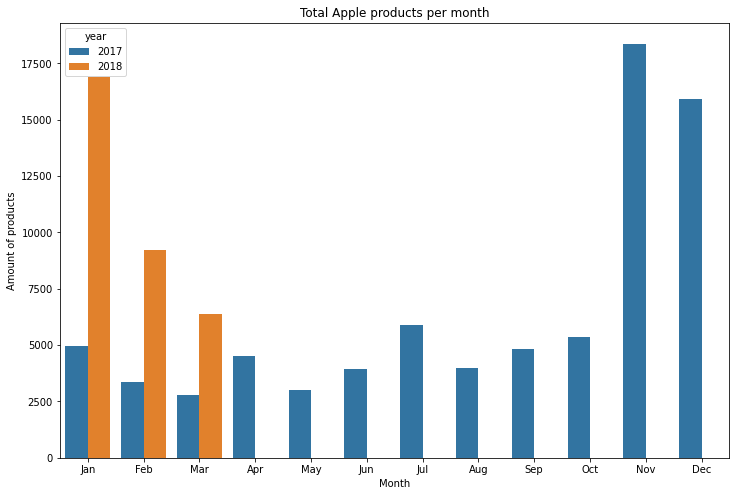

In [7]:
# plot the chart
plt.subplots(figsize=(12, 8))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

p = sns.barplot(
    data=bar_df,
    x='month',
    y='product_quantity',
    hue='year',
    order=months
)

plt.xlabel('Month')
plt.ylabel('Amount of products')
plt.title('Total Apple products per month')
plt.show()

From the barplot created, what business conclusions can you draw about the signicant increase in Apple products in 2018?

Are there any changes you would make to refine your analysis?

## **Challenge 2:**
Continuing our theme of barplots - make a bar plot showing the amount of orders placed per hour. If we can see that more orders are placed at 3pm compared to 3am, we know when is best to do maintenance work on the servers

In [8]:
orders['created_date'] = pd.to_datetime(orders['created_date'])

In [9]:
orders['hour'] = orders['created_date'].dt.hour

In [10]:
orders_ = orders.groupby('hour').agg({'order_id': 'sum'}).reset_index()

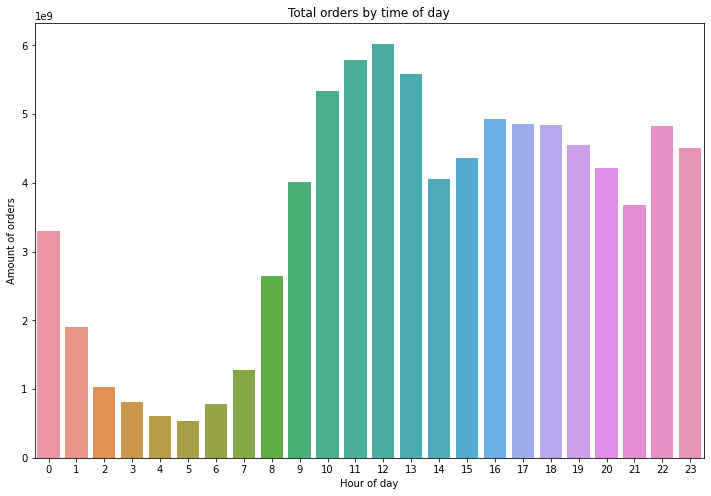

In [11]:
# plot the chart
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=orders_,
    x='hour',
    y='order_id'
)

plt.xlabel('Hour of day')
plt.ylabel('Amount of orders')
plt.title('Total orders by time of day')
plt.show()

Does this plot help you analyse the business, or does it lead you to false conclusions. Would you need to refine your data further by filtering for only completed orders, or using the mean instead of the sum? Is a barplot the best representation of this data. **It's easy to make something beautiful, but not always easy to make something meaningful**

## **Challenge 3:**
Some items with same SKU have different unit_price for different orders

Create a boxplot of unit_price for 20 most frequently sold items

Use the orderlines table

In [12]:
'''
Sort the items by their frequency and save their 'sku' to list.  
-> group by 'sku' with aggregation function count  
-> sort values descending  
-> take only top 20  
-> save sku to list (.to_list())  
'''

list_of_sku = orderlines.groupby('sku')['id_order'].count().sort_values(ascending=False).head(20).index.to_list()

In [13]:
# Filter the values in ordelines where sku is the one from the list we made above.  
# Keep only 'sku' and 'unit_price' columns

df_for_plot = orderlines.loc[orderlines['sku'].isin(list_of_sku),['sku','unit_price']]

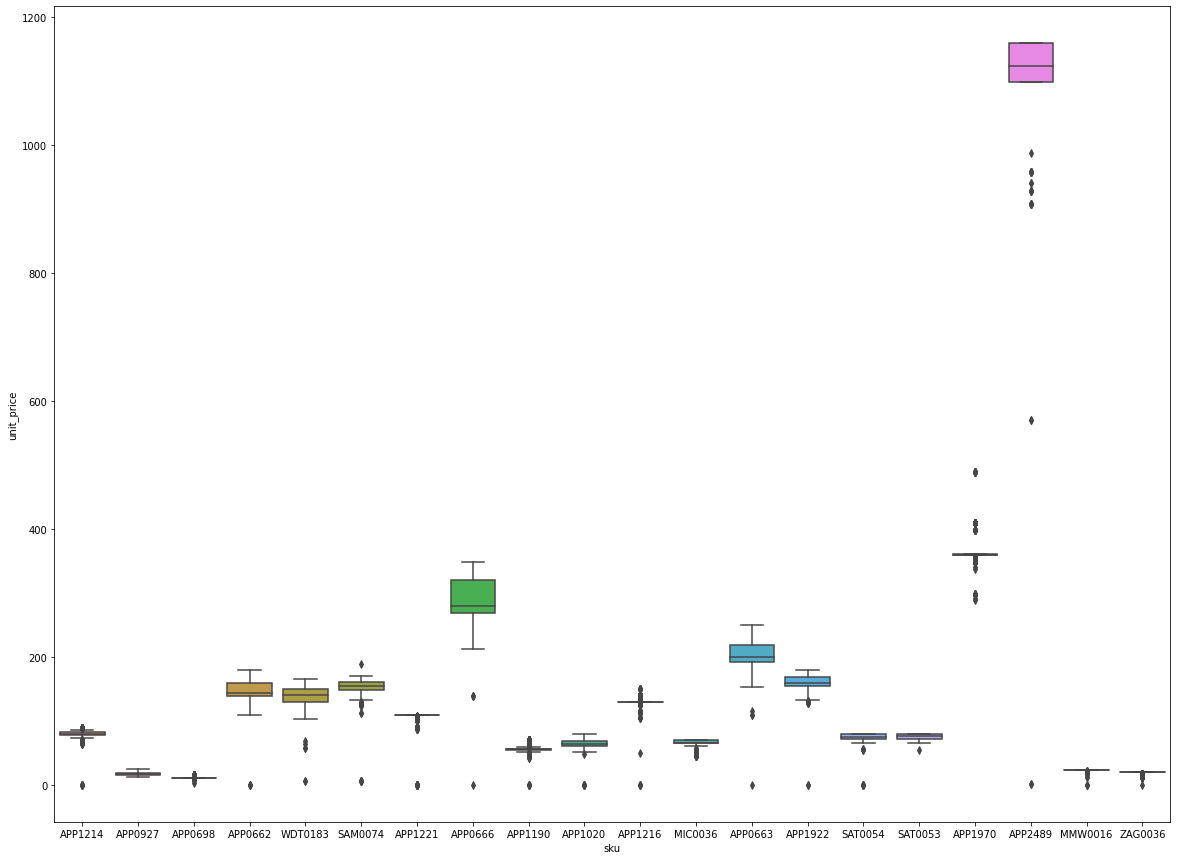

In [14]:
# Use boxplot to show distribution of unit_prices
plt.subplots(figsize=(20, 15))
sns.boxplot(data=df_for_plot, x='sku', y='unit_price');

## **Challenge 4:**
Show evolution for the amount of orders in different states (i.e. completed, cancelled etc...) for each month. Each state should have it's own line in different color

In [15]:
# Change 'created_date' to datetime

orders['created_date'] = pd.to_datetime(orders['created_date'])

In [16]:
# # Create column 'month' and year by extracting month and year from 'created_date' with strftime (This table can help you https://strftime.org/)  

orders['year_month'] = orders['created_date'].dt.strftime('%Y-%m')

In [17]:
# Groupby 'month', 'monthindex' and 'state' and aggregate counting 'state'

df_for_lineplot = orders.groupby(['year_month','state']).agg({'state':'count'})

In [18]:
# Rename column 'state' to 'count' and then reset_index()

df_for_lineplot = df_for_lineplot.rename(columns={'state':'count'}).reset_index()

In [19]:
df_for_lineplot.head()

,year_month,state,count
0,2017-01,Cancelled,531
1,2017-01,Completed,5111
2,2017-01,Pending,473
3,2017-01,Place Order,2564
4,2017-01,Shopping Basket,8410


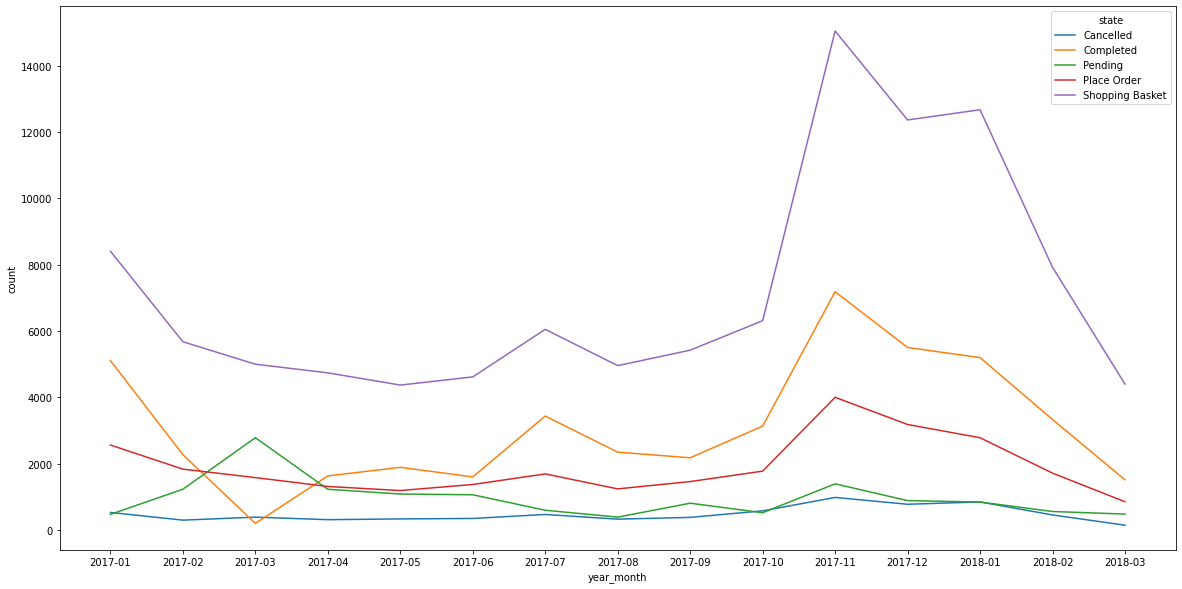

In [20]:
# Plot the new dataframe with sns.lineplot. Don't forget to hue by 'state'

plt.figure(figsize=(20,10))
sns.lineplot(data=df_for_lineplot,x='year_month',y='count',hue='state');

# Solutions to the original challenges

## **Challenge 1:**
Only a fraction of the total number of orders end up being completed. Let's call this fraction (Completed orders / Total number of orders) 'Orders Conversion Rate'. Can you plot the weekly evolution of the 'Orders Conversion Rate'? Find the best chart to represent it.

HINT: Trends throughout time are best represented by lines. Search how to do line plots with Seaborn.

In [21]:
orders_state_count = (
orders
    .assign(week = lambda x: pd.to_numeric(x['created_date'].dt.strftime('%W')), 
           year = lambda x: x['created_date'].dt.strftime('%Y'))
    .groupby(['year','week','state'])
    .agg({'order_id':'count'})
    .reset_index()
    .rename(columns={'order_id':'state_count'})
)
orders_state_count.head(2)

,year,week,state,state_count
0,2017,0,Cancelled,16
1,2017,0,Completed,109


In [22]:
orders_count = (
orders
    .assign(week = lambda x: pd.to_numeric(x['created_date'].dt.strftime('%W')), 
           year = lambda x: x['created_date'].dt.strftime('%Y'))
    .groupby(['year','week'])
    .agg({'order_id':'count'})
    .reset_index()
    .rename(columns={'order_id':'order_count'})
)
orders_count.head()

,year,week,order_count
0,2017,0,500
1,2017,1,4557
2,2017,2,4404
3,2017,3,3100
4,2017,4,3162


In [23]:
(
orders_state_count
 .merge(orders_count, how='left', on=['year','week'])
 .assign(state_perc = lambda x: x['state_count'] / x['order_count']))

,year,week,state,state_count,order_count,state_perc
0,2017,0,Cancelled,16,500,0.032000
1,2017,0,Completed,109,500,0.218000
2,2017,0,Pending,8,500,0.016000
3,2017,0,Place Order,77,500,0.154000
4,2017,0,Shopping Basket,290,500,0.580000
...,...,...,...,...,...,...
315,2018,11,Cancelled,25,1519,0.016458
316,2018,11,Completed,293,1519,0.192890
317,2018,11,Pending,269,1519,0.177090
318,2018,11,Place Order,183,1519,0.120474


In [24]:
p_df = (
orders
    .assign(week = lambda x: pd.to_numeric(x['created_date'].dt.strftime('%W')), 
           year = lambda x: x['created_date'].dt.strftime('%Y'))
    .groupby(['year','week','state'])
    .agg({'order_id':'count'})
    .reset_index()
    .assign(week_n_orders = lambda x: x.groupby(['year','week'])['order_id'].transform('sum'))
    .assign(state_perc = lambda x: x['order_id'] / x['week_n_orders'])
    .query('state == "Completed"')
)
p_df.head(30)

,year,week,state,order_id,week_n_orders,state_perc
1,2017,0,Completed,109,500,0.218000
6,2017,1,Completed,1253,4557,0.274962
11,2017,2,Completed,1296,4404,0.294278
16,2017,3,Completed,957,3100,0.308710
21,2017,4,Completed,1040,3162,0.328906
26,2017,5,Completed,905,2981,0.303589
31,2017,6,Completed,698,2718,0.256806
36,2017,7,Completed,799,3013,0.265184
41,2017,8,Completed,305,2771,0.110069
46,2017,9,Completed,44,2694,0.016333


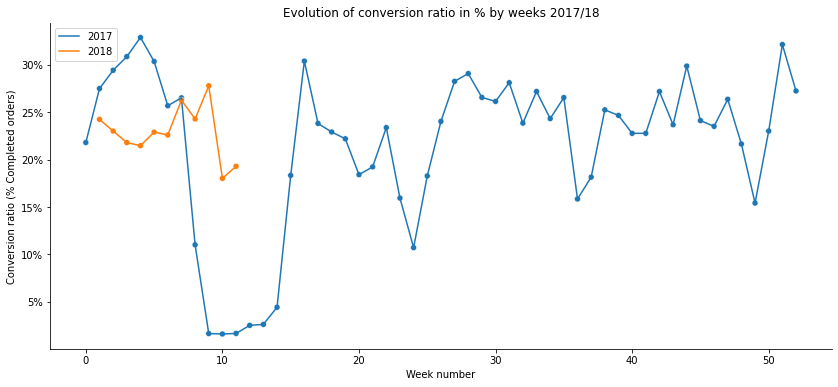

In [25]:
plt.subplots(figsize=(14, 6))

ax = sns.scatterplot(data=p_df, x='week', y='state_perc', hue='year', legend=None)
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(val) for val in vals])
sns.lineplot(data=p_df, x='week', y='state_perc', hue='year')

plt.legend(facecolor='white')
plt.title('Evolution of conversion ratio in % by weeks 2017/18')
plt.ylabel('Conversion ratio (% Completed orders)')
plt.xlabel('Week number')
sns.despine()
plt.show()

## **Challenge 2:**
Show the evolution of the average discount (in %) by each month

In [26]:
p_df = (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    .merge(products, how='left')
    .assign(price = lambda x: np.where(np.isnan(x['price']), x['max_price_orderlines'], x['price']))
    .assign(disc = lambda x: x['price'] - x['unit_price'],
           disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100), 
           year_month = lambda x: x['date'].dt.strftime('%Y-%m'))
    .groupby(['year_month'])
    .agg({'disc_perc':'mean'})
    .reset_index()
)
p_df

,year_month,disc_perc
0,2017-01,24.057143
1,2017-02,19.139109
2,2017-03,17.447653
3,2017-04,17.647894
4,2017-05,15.150337
5,2017-06,16.408392
6,2017-07,24.004053
7,2017-08,19.916261
8,2017-09,19.550512
9,2017-10,21.225448


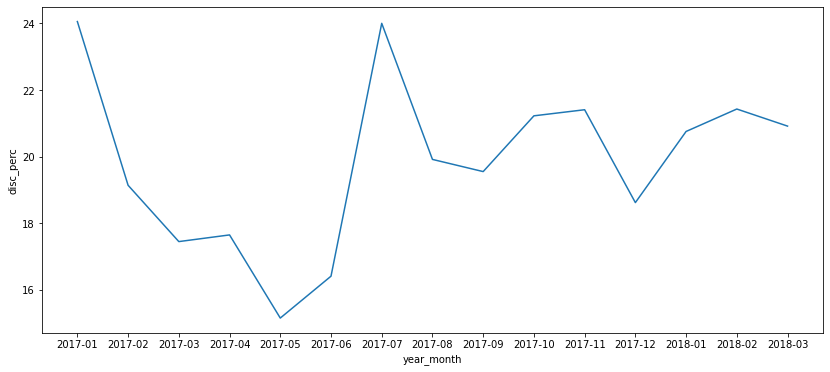

In [27]:
plt.subplots(figsize=(14, 6))
sns.lineplot(data=p_df, x='year_month', y='disc_perc');

## **Challenge 3:**
Show the top 30 products with the highest discounts in absolute values, on average.

In [28]:
p_df = (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .assign(short = lambda x: x['sku'].str[:3])
    .merge(brands, how='left', on='short')
    .query('state == "Completed"')
    .merge(products, how='left')
    .assign(price = lambda x: np.where(np.isnan(x['price']), x['max_price_orderlines'], x['price']))
    .assign(disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100), 
            disc = lambda x: x['price'] - x['unit_price'])
# #     .query('long != "Pack"')
    .groupby(['long','sku'])
    .agg({'disc':'mean',
         'disc_perc':'mean'})
    .reset_index()
    .sort_values('disc', ascending=False)
    .head(30)
#     .reset_index()
    .merge(products)
    .assign(sku_name = lambda x: x['sku'] + ' - ' + x['name'])
)
p_df.head()

,long,sku,disc,disc_perc,name,desc,price,type,max_price_orderlines,sku_name
0,LaCie,LAC0223,1511.20,15.0,12big LaCie Hard Disk 120TB RAID Thunderbolt 3...,12 120TB hard drive bays with RAID 5 two ports...,9799.0,11935397,NaN,LAC0223 - 12big LaCie Hard Disk 120TB RAID Thu...
1,Pack,PAC0448,1403.01,22.0,Apple Mac Pro six cores 35GHz | 64GB RAM | 512...,New Mac Pro with 64GB of RAM 6 Core 2 GPU and ...,6329.0,1282,NaN,PAC0448 - Apple Mac Pro six cores 35GHz | 64GB...
2,Pack,PAC1628,1373.41,25.4,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,5389.0,"5,74E+15",NaN,"PAC1628 - Apple iMac 27 ""Core i7 Retina 5K 4GH..."
3,Pack,PAC1597,1362.01,30.0,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",Desktop computer iMac 27-inch 3.2GHz Core i5 5...,4489.0,"5,74E+15",NaN,"PAC1597 - Apple iMac 27 ""Core i5 3.2GHz Retina..."
4,Pack,PAC1618,1338.01,26.0,"Apple iMac 27 ""Core i7 Retina 5K 4GHz | 32GB R...",IMac desktop computer 27 inch Retina 5K 4GHz C...,5089.0,"5,74E+15",NaN,"PAC1618 - Apple iMac 27 ""Core i7 Retina 5K 4GH..."


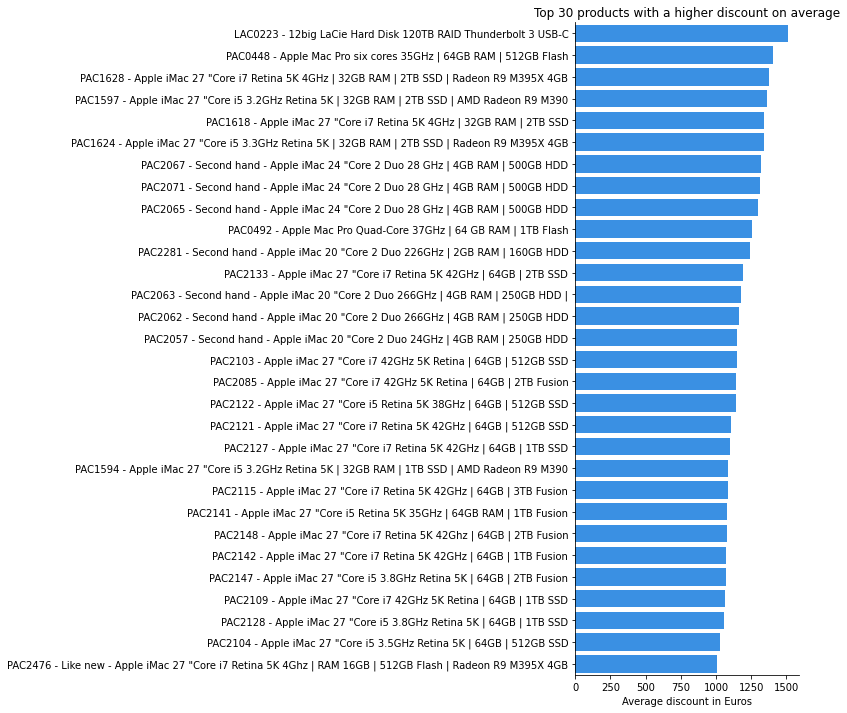

In [29]:
plt.subplots(figsize=(4, 12))

sns.barplot(data=p_df, x='disc', y='sku_name', color='dodgerblue')

plt.title('Top 30 products with a higher discount on average')
plt.xlabel('Average discount in Euros')
plt.ylabel('')
sns.despine()
plt.show()

## **Challenge 4:**
Show the distributions of discounts for each brand. Choose the discount measure you consider better to compare all brands. HINT: you can use the first 3 characters of the sku name to merge it with the brands table.

In [30]:
p_df = (
orderlines
    .merge(orders, how='left', left_on='id_order', right_on='order_id')
    .query('state == "Completed"')
    .merge(products, how='left')
    .assign(price = lambda x: np.where(np.isnan(x['price']), x['max_price_orderlines'], x['price']))
    .assign(disc_perc = lambda x: round((1 - x['unit_price'] / x['price'])*100), 
            disc = lambda x: x['price'] - x['unit_price'])
#     .merge(products)
    .assign(short = lambda x: x['sku'].str[:3])
    .merge(brands)
    .assign(sort_val = lambda x: x.groupby(['sku'])['disc'].transform('mean'),
           index = lambda x: x['long'])
    .sort_values('sort_val', ascending=False)
    .set_index('index')
)
p_df.sample(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,total_price,check_orders_x,short_sku,...,name,desc,price,type,max_price_orderlines,disc_perc,disc,short,long,sort_val
index,,,,,,,,,,,,,,,,,,,,,
LaCie,1592183,502140,0,1,LAC0227-A,148.16,2018-01-31 13:38:55,148.16,True,LAC,...,Open - LaCie Porsche Design Desktop Drive 6TB ...,External Hard Drive Refurbished 35-inch 6TB US...,199.99,11935397,NaN,26.0,51.83,LAC,LaCie,51.830000
iFixit,1354108,400883,0,1,IFX0154,44.95,2017-09-17 01:41:52,44.95,True,IFX,...,iFixit Battery Battery Kit complete change iPh...,Battery replacement kit with tools for iPhone ...,44.95,12645406,NaN,0.0,0.00,IFX,iFixit,0.802857


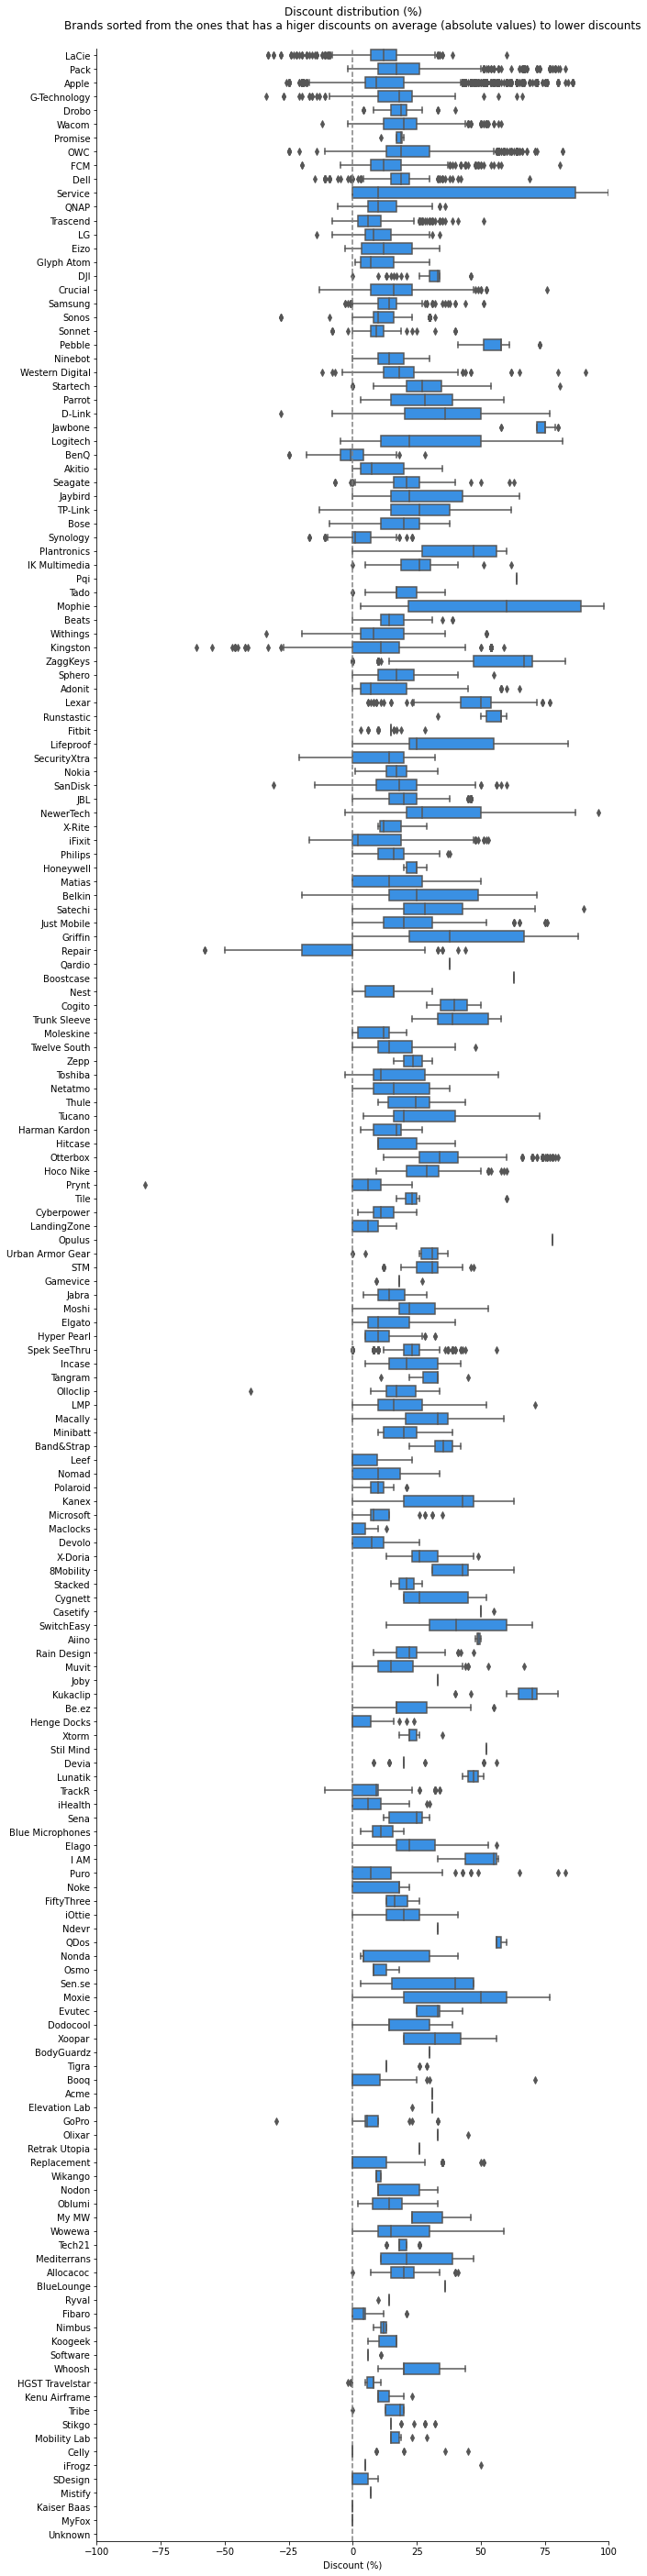

In [31]:
plt.subplots(figsize=(10, 50))

p = sns.boxplot(data=p_df, y='long', x='disc_perc', color='dodgerblue')

p.axvline(0, linestyle='--', c='gray')

plt.title('Discount distribution (%)\nBrands sorted from the ones that has a higer discounts on average (absolute values) to lower discounts\n')
plt.xlabel('Discount (%)')
plt.ylabel('')
plt.xlim(-100, 100)
sns.despine()
plt.show()